# ETL Pipeline Preparation
Follow the instructions below to help you create your ETL pipeline.
### 1. Import libraries and load datasets.
- Import Python libraries
- Load `messages.csv` into a dataframe and inspect the first few lines.
- Load `categories.csv` into a dataframe and inspect the first few lines.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import sqlite3
from helper import *

In [2]:
# load messages dataset
messages = pd.read_csv('messages.csv', delimiter = ',')
messages.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [3]:
# load categories dataset
categories = pd.read_csv('categories.csv', delimiter = ',')
categories.head()

,id,categories
0,2,related-1;request-0;offer-0;aid_related-0;medi...
1,7,related-1;request-0;offer-0;aid_related-1;medi...
2,8,related-1;request-0;offer-0;aid_related-0;medi...
3,9,related-1;request-1;offer-0;aid_related-1;medi...
4,12,related-1;request-0;offer-0;aid_related-0;medi...


### 2. Merge datasets.
- Merge the messages and categories datasets using the common id
- Assign this combined dataset to `df`, which will be cleaned in the following steps

In [4]:
# merge datasets
df = messages.merge(categories, how = 'outer', on = 'id')
df.head()

,id,message,original,genre,categories
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,related-1;request-0;offer-0;aid_related-0;medi...
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,related-1;request-0;offer-0;aid_related-1;medi...
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,related-1;request-0;offer-0;aid_related-0;medi...
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,related-1;request-1;offer-0;aid_related-1;medi...
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,related-1;request-0;offer-0;aid_related-0;medi...


In [5]:
print("Message's shape: {}, Category's shape:{}, After merging: {}".format(messages.shape, categories.shape, df.shape))

Message's shape: (26248, 4), Category's shape:(26248, 2), After merging: (26386, 5)


In [6]:
# check number of missing values in each column
df.isnull().sum().sort_values(ascending = False)/df.shape[0]

original      0.611688
categories    0.000000
genre         0.000000
message       0.000000
id            0.000000
dtype: float64

### 3. Split `categories` into separate category columns.
- Split the values in the `categories` column on the `;` character so that each value becomes a separate column. You'll find [this method](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Series.str.split.html) very helpful! Make sure to set `expand=True`.
- Use the first row of categories dataframe to create column names for the categories data.
- Rename columns of `categories` with new column names.

In [7]:
# create a dataframe of the 36 individual category columns
categories = pd.DataFrame(data = np.zeros((df.shape[0], 36), dtype = float))
categories.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# select the first row of the categories dataframe
row = df.iloc[0]
# use this row to extract a list of new column names for categories.
# one way is to apply a lambda function that takes everything 
# up to the second to last character of each string with slicing
category_colnames = row.str.split(';', expand = True).loc['categories'].apply(lambda x : x.split('-')[0])
print(category_colnames)

0                    related
1                    request
2                      offer
3                aid_related
4               medical_help
5           medical_products
6          search_and_rescue
7                   security
8                   military
9                child_alone
10                     water
11                      food
12                   shelter
13                  clothing
14                     money
15            missing_people
16                  refugees
17                     death
18                 other_aid
19    infrastructure_related
20                 transport
21                 buildings
22               electricity
23                     tools
24                 hospitals
25                     shops
26               aid_centers
27      other_infrastructure
28           weather_related
29                    floods
30                     storm
31                      fire
32                earthquake
33                      cold
34            

In [9]:
# rename the columns of `categories`
categories.columns = category_colnames
categories.head()

categories,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 4. Convert category values to just numbers 0 or 1.
- Iterate through the category columns in df to keep only the last character of each string (the 1 or 0). For example, `related-0` becomes `0`, `related-1` becomes `1`. Convert the string to a numeric value.
- You can perform [normal string actions on Pandas Series](https://pandas.pydata.org/pandas-docs/stable/text.html#indexing-with-str), like indexing, by including `.str` after the Series. You may need to first convert the Series to be of type string, which you can do with `astype(str)`.

In [10]:
# convert category values row-wise
for irow, row in enumerate(df.iterrows()):
    # list of categories in each row of df.categories
    cat_list = row[1][4].split(';')
    # only keep the last letter, which is "1" or "0"
    cat_list = [x[-1] for x in cat_list]
    # convert from list to integer array
    cat_array = np.array(cat_list).astype(float)
    # set array values to categories dataframe by row index
    categories.iloc[irow,:] = cat_array
categories.head()

categories,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Sanity Check on the Value in Each Category

Iterate through each column to find sets of possible values. The cell below shows that a small amount of entries in the general category **related** column contains a value of 2, which is less than 1% of the total amount of messages.

In [11]:
sanity_check(categories)

The column 'related' contains additional values: {0.0, 1.0, 2.0}
There are 204 out of 26386 (0.773137269764269%) in the 'related' column


Let's dive into more details about these messages!

In [12]:
categories[categories.related ==2].sum()

categories
related                   408.0
request                     0.0
offer                       0.0
aid_related                 0.0
medical_help                0.0
medical_products            0.0
search_and_rescue           0.0
security                    0.0
military                    0.0
child_alone                 0.0
water                       0.0
food                        0.0
shelter                     0.0
clothing                    0.0
money                       0.0
missing_people              0.0
refugees                    0.0
death                       0.0
other_aid                   0.0
infrastructure_related      0.0
transport                   0.0
buildings                   0.0
electricity                 0.0
tools                       0.0
hospitals                   0.0
shops                       0.0
aid_centers                 0.0
other_infrastructure        0.0
weather_related             0.0
floods                      0.0
storm                       0

### Finding

From the table above, we can see that all other categories are 0 for related-category of value 2. It is likely that they cannot be identified as related/not related to the disaster. Therefore, we can simply drop them from the dataset, as shown in the following step.

### Evaluate Data Variance in Each Category 

The quality of data plays a critical role in the performance of the model. The figure below shows percentage of 1-s over 0-s, sorted in descending order. Ideally, we want a balanced dataset, with similary amount of 1s and 0s in each category. But the plot shows some categories contain very little amount of 1s. In particular, **child_alone** only contains 0. The unbalance dataset will definitely reduce the performance of the model on these categories.

In [13]:
cat1 = categories.sum()/categories.shape[0]
cat0 = 1 - cat1
print("Percentage of ones in each column:\n\n{}".format(cat1*100))

Percentage of ones in each column:

categories
related                   77.503221
request                   17.103767
offer                      0.458577
aid_related               41.514439
medical_help               7.954976
medical_products           4.998863
search_and_rescue          2.747669
security                   1.785038
military                   3.270674
child_alone                0.000000
water                      6.382172
food                      11.202911
shelter                    8.875919
clothing                   1.553854
money                      2.296672
missing_people             1.140756
refugees                   3.335102
death                      4.563026
other_aid                 13.128174
infrastructure_related     6.476920
transport                  4.593345
buildings                  5.097400
electricity                2.038960
tools                      0.602592
hospitals                  1.072538
shops                      0.454787
aid_centers      

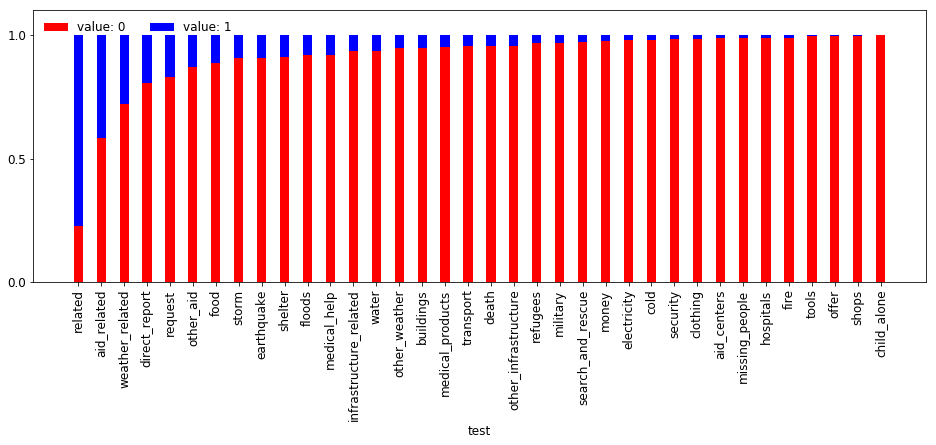

In [14]:
bar_chart(cat0, cat1, is_sort = True, fig_size = (16, 5))

In [15]:
# drop categories that contain 100% of 1s or 0s
col_todrop = cat1[(cat1 == 0) | (cat1 == 1)].index.values.tolist()
categories.drop(labels = col_todrop, axis = 1, inplace = True)

### 5. Replace `categories` column in `df` with new category columns.
- Drop the categories column from the df dataframe since it is no longer needed.
- Concatenate df and categories data frames.

In [16]:
# drop the original categories column from `df`
df.drop(labels = 'categories', axis = 1, inplace = True)

df.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [17]:
# concatenate the original dataframe with the new `categories` dataframe
df = pd.concat([df, categories], axis = 1)
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 6. Remove duplicates.
- Check how many duplicates are in this dataset.
- Drop the duplicates.
- Confirm duplicates were removed.

In [18]:
# check number of duplicates
df_duplicated = df.duplicated()
n_duplicates = df[df_duplicated == True].shape[0]
print("There are {} duplicates in the dataset:".format(n_duplicates))
df[df_duplicated].head()

There are 170 duplicates in the dataset:


,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
164,202,?? port au prince ?? and food. they need gover...,p bay pap la syen ak manje. Yo bezwen ed gouve...,direct,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165,202,?? port au prince ?? and food. they need gover...,p bay pap la syen ak manje. Yo bezwen ed gouve...,direct,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
658,804,elle est vraiment malade et a besoin d'aide. u...,she is really sick she need your help. please ...,direct,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
659,804,elle est vraiment malade et a besoin d'aide. u...,she is really sick she need your help. please ...,direct,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
660,804,elle est vraiment malade et a besoin d'aide. u...,she is really sick she need your help. please ...,direct,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# drop duplicates
df = df[~df_duplicated]

In [20]:
# check number of duplicates
df_duplicated = df.duplicated()
n_duplicates = df[df_duplicated == True].shape[0]
print("There are {} duplicates in the dataset:".format(n_duplicates))

There are 0 duplicates in the dataset:


Remove messages where related category is 2.

In [21]:
df = df[df.related != 2]

In [22]:
df[df.related ==1].iloc[100, :]

id                                                                      152
message                   We live in La Pleine. Since Tuesday we've been...
original                  NOU ABITE LAPLN, DEPI MADI A SE NAN LARI NAP D...
genre                                                                direct
related                                                                   1
request                                                                   1
offer                                                                     0
aid_related                                                               1
medical_help                                                              0
medical_products                                                          0
search_and_rescue                                                         0
security                                                                  0
military                                                                  0
water       

### 7. Save the clean dataset into an sqlite database.
You can do this with pandas [`to_sql` method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html) combined with the SQLalchemy library.

In [23]:
conn = sqlite3.connect('figure_eight.db')
df.to_sql('msg_cat', con = conn, if_exists='replace', index=False)
# commit any changes to the database and close the database
conn.commit()
conn.close()

### 8. Use this notebook to complete `etl_pipeline.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database based on new datasets specified by the user. Alternatively, you can complete `etl_pipeline.py` in the classroom on the `Project Workspace IDE` coming later.

In [22]:
import sys
import pandas as pd
import numpy as np
import sqlite3

def load_data(messages_filepath, categories_filepath):
    '''
    Usage: read and merge messages and categories csv files into one dataframe objects

    Args:
        messages_filepath (str): filepath and filename for messages file 
        categories_filepath (str): filepath and filename for categories file 
    
    Returns:
        the merged dataframe
    '''
    # read messages file
    print('Reading message dataset.')
    df_messages = pd.read_csv(messages_filepath, delimiter = ',')
    # read categories file
    print('Reading category dataset.')
    df_categories = pd.read_csv(categories_filepath, delimiter = ',')
    # merge datasets
    print('Merging two datasets.')
    df_merge = df_messages.merge(df_categories, how = 'outer', on = 'id')
    return df_merge

def deduplicate(df):
    '''
    Usage: remove all duplicate values in the dataframe
        
    Args:
        df (dataframe): the dataframe you want to perform deduplication
           
    Returns:
        None
    '''
    # check number of duplicates
    df_duplicated = df.duplicated()
    n_duplicates = df[df_duplicated == True].shape[0]
    print("{} duplicates found and removed from the dataset".format(n_duplicates))
    # drop duplicates
    if n_duplicates > 0:
        df = df[~df_duplicated]
    return

# sanity check on the values in each column
def sanity_check(df):
    '''
    Usage: Check if there is any value other than 0 or 1 for each column.
    '''
    flag = False
    for col in df.columns:
        value_set = set(df[col].unique())
        if (value_set - set([0, 1])):
            flag = True
            print("The column '{}' contains additional values: {}".format(col,value_set))
            idx = (~df[col].isin([0, 1]))
            print("There are {} out of {} ({}%) in the 'related' column" \
              .format(df[idx].shape[0], df.shape[0], 
                      df[idx].shape[0]/df.shape[0]*100))
            #print("Impute the abnormal value with the mode {} in this column.".format(df[col].mode()[0]))
            #df.loc[idx, col] = df[col].mode()[0]
    if flag is False:
        print("All data entries are either 0 or 1 in the dataset")
    return

def clean_data(df):
    '''
    Usage: merge two datasets of messages categories, and transform into one dataframe with customized format
        
    Args:
        df (dataframe): the dataframe to apply cleaning processes
        
    Returns:
        a cleaned dataframe
    '''
    # create a dataframe of the 36 individual category columns
    categories = pd.DataFrame(data = np.zeros((df.shape[0], 36), dtype = float))
    # split categories into separate category columns
    category_colnames = df.iloc[0] \
                        .str.split(';', expand = True).loc['categories'].apply(lambda x : x.split('-')[0])
    # rename the columns of `categories`
    categories.columns = category_colnames
    print('Parsing category values row-wise.')
    # convert category values row-wise
    for irow, row in enumerate(df.iterrows()):
        # list of categories in each row of df.categories
        cat_list = row[1][4].split(';')
        # only keep the last letter, which is "1" or "0"
        cat_list = [x[-1] for x in cat_list]
        # convert from list to integer array
        cat_array = np.array(cat_list).astype(float)
        # set array values to categories dataframe by row index
        categories.iloc[irow,:] = cat_array
    # impute values that are not 0 or 1 with the mode in the corresponding column
    sanity_check(categories)
    # drop categories that contain 100% of 1s or 0s
    cat1 = categories.sum()/categories.shape[0]
    cat0 = 1 - cat1
    col_todrop = cat1[(cat1 == 0) | (cat1 == 1)].index.values.tolist()
    for col in col_todrop:
        print("drop categories that contain 100% of 1s or 0s: {}".format(col))
    categories.drop(labels = col_todrop, axis = 1, inplace = True)
    # drop the original categories column from `df`
    df.drop(labels = 'categories', axis = 1, inplace = True)
    # concatenate the original dataframe with the new `categories` dataframe
    df = pd.concat([df, categories], axis = 1)
    print('Removing duplicated values.')
    # duplication
    deduplicate(df)
    print('remove message where the related category is flagged as 2.')
    df = df[df.related != 2]
    return df
    

def save_data(df, database_filename = 'figure_eight.db', table_name = 'msg_cat'):
    '''
    Usage: load the dataset into the database
        
    Args:
        df (dataframe): the dataframe you want to load
        database_filename (str): the database name
        table_name (str): the table name
            
    Returns:
        None
    '''
    print('Opening connection.')
    conn = sqlite3.connect(database_filename)
    print('Loading data to table "{}" in the database "{}".'.format(table_name, database_filename))
    df.to_sql(table_name, con = conn, if_exists='replace', index=False)
    # commit any changes to the database and close the database
    conn.commit()
    conn.close()
    print('Connection is closed.')
    return None

def read_db(db_name = 'figure_eight.db', tbl_name = 'msg_cat', limit = None):
    '''
    Usage: read data from the database
        
    Args:
        db_name (str): the database name
        tbl_name (str): the table name
        limit (int): the number of returned records, 
                     default - None (return all records)
            
    Returns:
        the dataframe from database queries
    '''
    print('Opening connection.')
    conn = sqlite3.connect(db_name)
    # get a cursor
    cur = conn.cursor()
    cmd = "SELECT * FROM " + tbl_name
    if limit is not None:
        cmd = cmd + ' limit ' + str(limit)
    print('Reading data from table "{}" in the database "{}".'.format(tbl_name, db_name))
    df = pd.read_sql(cmd, con = conn)
    conn.commit()
    conn.close()
    print('Connection is closed.')
    return df


def main():
    if len(sys.argv) == 4:

        messages_filepath, categories_filepath, database_filepath = sys.argv[1:]

        print('Loading data...\n    MESSAGES: {}\n    CATEGORIES: {}'
              .format(messages_filepath, categories_filepath))
        df = load_data(messages_filepath, categories_filepath)

        print('Cleaning data...')
        df = clean_data(df)
        
        print('Saving data...\n    DATABASE: {}'.format(database_filepath))
        save_data(df, database_filepath)
        
        print('Cleaned data saved to database!')
    
    else:
        print('Please provide the filepaths of the messages and categories '\
              'datasets as the first and second argument respectively, as '\
              'well as the filepath of the database to save the cleaned data '\
              'to as the third argument. \n\nExample: python process_data.py '\
              'disaster_messages.csv disaster_categories.csv '\
              'DisasterResponse.db')


if __name__ == '__main__':
    main()

Please provide the filepaths of the messages and categories datasets as the first and second argument respectively, as well as the filepath of the database to save the cleaned data to as the third argument. 

Example: python process_data.py disaster_messages.csv disaster_categories.csv DisasterResponse.db


In [24]:
import pandas as pd
import numpy as np
import sqlite3

class ETL_pipeline():
    # load dataset
    def extract(self, msg_file = 'messages.csv', cat_file = 'categories.csv'):
        '''
        Usage: read messages and categories csv files into two dataframe objects
        
        Args:
            msg_file (str): filepath and filename for messages file 
            cat_file (str): filepath and filename for categories file 
    
        Returns:
            two dataframes: df_messages, df_categories
    
        '''
        df_messages = pd.read_csv(msg_file, delimiter = ',')
        df_categories = pd.read_csv(cat_file, delimiter = ',')
        return df_messages, df_categories
    
    def deduplicate(self, df):
        '''
        Usage: remove all duplicate values in the dataframe
        
        Args:
            df (dataframe): the dataframe you want to perform deduplication
           
        Returns:
            None
        '''
        # check number of duplicates
        df_duplicated = df.duplicated()
        n_duplicates = df[df_duplicated == True].shape[0]
        print("{} duplicates found and removed from the dataset".format(n_duplicates))
        # drop duplicates
        if n_duplicates > 0:
            df = df[~df_duplicated]
        return
    
    # sanity check on the values in each column
    def sanity_check(self, df):
        '''
        Usage: If there is any column containing values outside 0 or 1, impute with the mode in this column.
        '''
        flag = False
        for col in df.columns:
            value_set = set(df[col].unique())
            if (value_set - set([0, 1])):
                flag = True
                print("The column '{}' contains additional values: {}".format(col,value_set))
                idx = (~df[col].isin([0, 1]))
                print("There are {} out of {} ({}%) in the 'related' column" \
                  .format(df[idx].shape[0], df.shape[0], 
                          df[idx].shape[0]/df.shape[0]*100))
                print("Impute the abnormal value with the mode {} in this column.".format(df[col].mode()[0]))
                df.loc[idx, col] = df[col].mode()[0]
        if flag is False:
            print("All data entries are either 0 or 1 in the dataset")
        return

    def transform(self, df_messages, df_categories):
        '''
        Usage: merge two datasets of messages categories, and transform into one dataframe with customized format
        
        Args:
            df_messages (dataframe): the dataframe of message dataset
            df_categories (dataframe): the dataframe of category dataset
            
        Returns:
            a cleaned dataset (dataframe)
        '''
        print('Merging two datasets.')
        # merge datasets
        df_merge = df_messages.merge(df_categories, how = 'outer', on = 'id')
        # create a dataframe of the 36 individual category columns
        categories = pd.DataFrame(data = np.zeros((df_merge.shape[0], 36), dtype = float))
        # split categories into separate category columns
        category_colnames = df_merge.iloc[0] \
                            .str.split(';', expand = True).loc['categories'].apply(lambda x : x.split('-')[0])
        # rename the columns of `categories`
        categories.columns = category_colnames
        print('Parsing category values row-wise.')
        # convert category values row-wise
        for irow, row in enumerate(df_merge.iterrows()):
            # list of categories in each row of df.categories
            cat_list = row[1][4].split(';')
            # only keep the last letter, which is "1" or "0"
            cat_list = [x[-1] for x in cat_list]
            # convert from list to integer array
            cat_array = np.array(cat_list).astype(float)
            # set array values to categories dataframe by row index
            categories.iloc[irow,:] = cat_array
        self.sanity_check(categories)
        # drop the original categories column from `df`
        df_merge.drop(labels = 'categories', axis = 1, inplace = True)
        # concatenate the original dataframe with the new `categories` dataframe
        df_merge = pd.concat([df_merge, categories], axis = 1)
        print('Removing duplicated values.')
        # duplication
        self.deduplicate(df_merge)
        return df_merge
    
    def load_db(self, df_results, db_name = 'figure_eight.db', tbl_name = 'msg_cat'):
        '''
        Usage: load the dataset into the database
        
        Args:
            df_results (dataframe): the dataframe you want to load
            db_name (str): the database name
            tbl_name (str): the table name
            
        Returns:
            None
        '''
        print('Opening connection.')
        conn = sqlite3.connect(db_name)
        print('Loading data to table "{}" in the database "{}".'.format(tbl_name, db_name))
        df_results.to_sql(tbl_name, con = conn, if_exists='replace', index=False)
        # commit any changes to the database and close the database
        conn.commit()
        conn.close()
        print('Connection is closed.')
        return None
    
    def read_db(self, db_name = 'figure_eight.db', tbl_name = 'msg_cat', limit = None):
        '''
        Usage: read data from the database
        
        Args:
            db_name (str): the database name
            tbl_name (str): the table name
            limit (int): the number of returned records, 
                         default - None (return all records)
            
        Returns:
            the dataframe from database queries
        '''
        print('Opening connection.')
        conn = sqlite3.connect(db_name)
        # get a cursor
        cur = conn.cursor()
        cmd = "SELECT * FROM " + tbl_name
        if limit is not None:
            cmd = cmd + ' limit ' + str(limit)
        print('Reading data from table "{}" in the database "{}".'.format(tbl_name, db_name))
        df = pd.read_sql(cmd, con = conn)
        conn.commit()
        conn.close()
        print('Connection is closed.')
        return df

In [25]:
pipeline = ETL_pipeline()
#df_messages, df_categories = pipeline.extract()
#df = pipeline.transform(df_messages, df_categories)
#pipeline.load_db(df)
df_db = pipeline.read_db()
df_db.head()

Opening connection.
Reading data from table "msg_cat" in the database "figure_eight.db".
Connection is closed.


,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
df_db.columns

Index(['id', 'message', 'original', 'genre', 'related', 'request', 'offer',
       'aid_related', 'medical_help', 'medical_products', 'search_and_rescue',
       'security', 'military', 'water', 'food', 'shelter', 'clothing', 'money',
       'missing_people', 'refugees', 'death', 'other_aid',
       'infrastructure_related', 'transport', 'buildings', 'electricity',
       'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure',
       'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold',
       'other_weather', 'direct_report'],
      dtype='object')

In [43]:
df_db[df_db.related == 1].iloc[400, :]

id                                                                      614
message                   Please, we are staying in a church. There are ...
original                  souple nou ebje nan yn legliz nou pa gen blese...
genre                                                                direct
related                                                                   1
request                                                                   1
offer                                                                     0
aid_related                                                               1
medical_help                                                              0
medical_products                                                          0
search_and_rescue                                                         0
security                                                                  0
military                                                                  0
water       

In [57]:
cat1=df_db.iloc[:, 4:].sum()/df_db.shape[0]*100
cat0=100-cat1

In [59]:
list(cat0.index)

['related',
 'request',
 'offer',
 'aid_related',
 'medical_help',
 'medical_products',
 'search_and_rescue',
 'security',
 'military',
 'water',
 'food',
 'shelter',
 'clothing',
 'money',
 'missing_people',
 'refugees',
 'death',
 'other_aid',
 'infrastructure_related',
 'transport',
 'buildings',
 'electricity',
 'tools',
 'hospitals',
 'shops',
 'aid_centers',
 'other_infrastructure',
 'weather_related',
 'floods',
 'storm',
 'fire',
 'earthquake',
 'cold',
 'other_weather',
 'direct_report']